In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.callbacks import History
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
#Load training and test data
df = pd.read_csv('Numerical_Experimental_Results_Wave_Attenuation.csv')

In [3]:
df.head()

,WG1,h0,h1,lambda,slope,B,WG18
0,0.205163,0.453972,0.220396,2.587182,0.02804,13.128900,0.033900
1,0.205163,0.453972,0.220396,2.587182,0.02804,1.953211,0.086912
2,0.205163,0.453972,0.220396,2.587182,0.02804,6.446903,0.058007
3,0.205163,0.453972,0.220396,2.587182,0.02804,4.453153,0.070416
4,0.205163,0.453972,0.220396,2.587182,0.02804,12.150976,0.035659


In [4]:
df.describe()

,WG1,h0,h1,lambda,slope,B,WG18
count,43032.000000,43032.000000,43032.000000,43032.000000,43032.000000,43032.000000,43032.000000
mean,0.149171,0.551829,0.201939,2.635640,0.042004,7.572313,0.045310
std,0.067320,0.086985,0.059590,0.226209,0.011392,3.790363,0.022906
min,0.040927,0.418571,0.116764,2.125437,0.016315,1.203618,0.008191
25%,0.066395,0.464695,0.148338,2.457077,0.034585,4.453153,0.027411
50%,0.164919,0.555817,0.190108,2.666356,0.041096,7.175663,0.040469
75%,0.209439,0.634688,0.256050,2.825603,0.049222,10.902629,0.059382
max,0.239227,0.698436,0.294119,3.050858,0.069525,14.290664,0.107361


<Axes: >

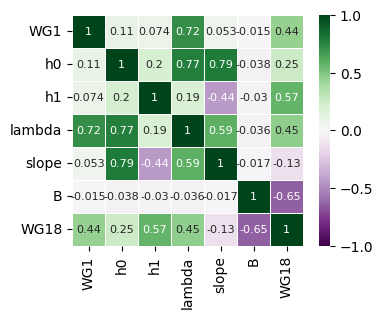

In [5]:
corrmat = df.corr()
plt.subplots(figsize=(4, 3))

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, center=0,
    cmap='PRGn',
    square=True, linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": 1, "ticks": [-1,-0.5,0,0.5,1]})

In [6]:
X = df.drop(["WG18"], axis=1)
y = df["WG18"]
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.1,random_state=101)

In [7]:
#Designing Deep Neural Network Architecture
history = History()
DNN_model = Sequential()
#Input layer
DNN_model.add(Dense(6, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))
#Hidden layers
DNN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
DNN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
DNN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#Output layer
DNN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [8]:
#Compile the Deep Neural Network
DNN_model.compile(loss= 'mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['mean_absolute_error'])
DNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 343 (1.34 KB)

 Trainable params: 343 (1.34 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Train the Deep Neural Network
DNN_model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=100,batch_size=64,callbacks=[history])
result = DNN_model.evaluate(X_test,y_test)

Epoch 1/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071
Epoch 2/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - val_loss: 0.0052 - val_mean_absolute_error: 0.0052
Epoch 3/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0049 - val_mean_absolute_error: 0.0049
Epoch 4/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 5/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 6/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - val_loss: 0.0047 - val_mean_absolute_error: 0.0047
Epoch 7/100
424/424 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0046 - mean_absolute_error: 0.0

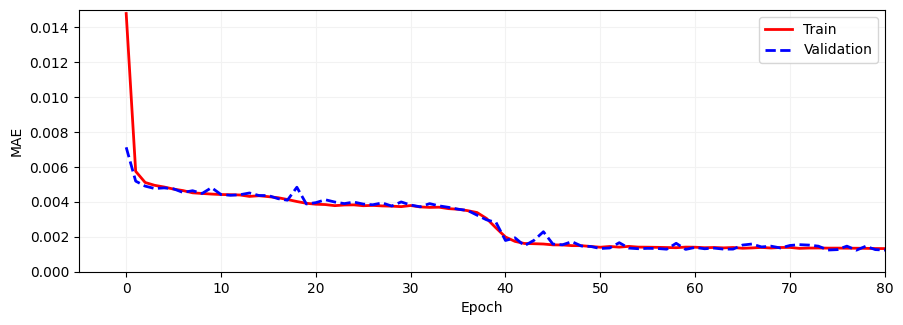

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10.4, 3.4))

ax.axis((-5, 80, 0.000, 0.015))
ax.plot(history.history['loss'], ls='-', lw=2, fillstyle='none',markersize=7, color='r', label="validation loss")
ax.plot(history.history['val_loss'], ls='--', lw=2, markersize=7, color='b', label="validation loss")
ax.set(ylabel='MAE')
ax.set(xlabel='Epoch')
ax.legend(['Train', 'Validation'], loc='upper right')
ax.grid(axis='both', color='0.95')

In [11]:
#Model prediction and evaluate the performance
y_train_pred_dnn = DNN_model.predict(X_train)
y_train_pred_DNN = y_train_pred_dnn[:,0]

y_test_pred_dnn = DNN_model.predict(X_test)
y_test_pred_DNN = y_test_pred_dnn[:,0]

y_val_pred_dnn = DNN_model.predict(X_val)
y_val_pred_DNN = y_val_pred_dnn[:,0]

y_all_pred_dnn = DNN_model.predict(X)
y_all_pred_DNN = y_all_pred_dnn[:,0]

848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1345/1345 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Text(0.1, 0.004, '(d)')

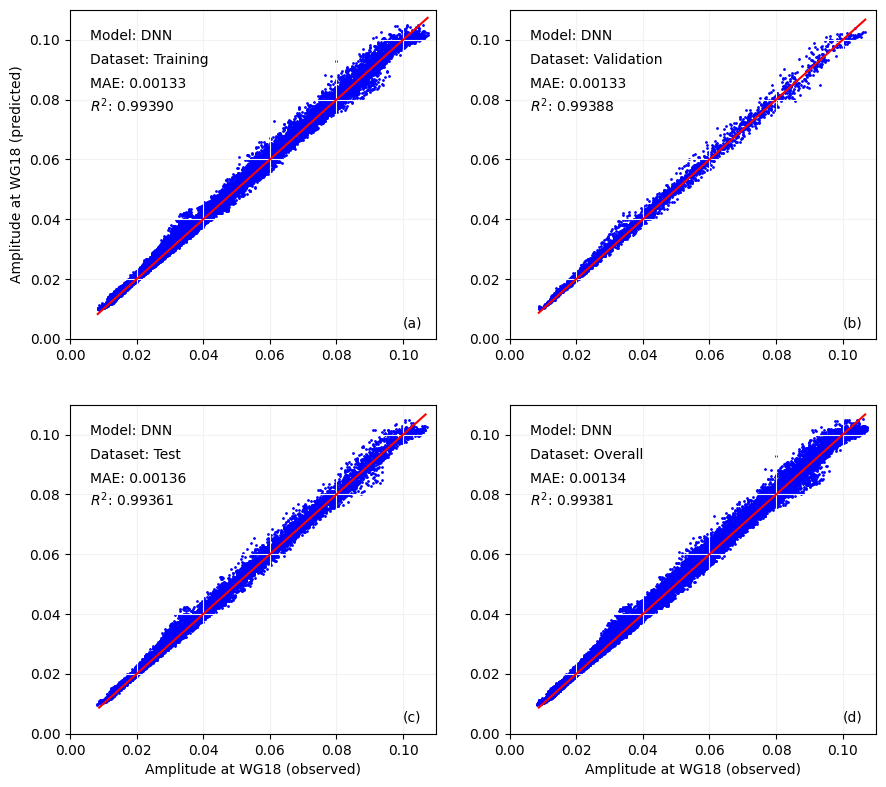

In [12]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10.4, 9.4))

ax1.axis((0, 0.11, 0., 0.11))
ax1.scatter(y_train, y_train_pred_DNN, c='blue',s=1)
p1_DNN = max(max(y_train_pred_DNN), max(y_train))
p2_DNN = min(min(y_train_pred_DNN), min(y_train))
ax1.plot([p1_DNN, p2_DNN], [p1_DNN, p2_DNN], 'r-')
ax1.grid(axis='both', color='0.95')
ax1.text(0.006, 0.1, "Model: DNN")
ax1.text(0.006, 0.092, "Dataset: Training")
ax1.text(0.006, 0.084, "MAE: %6.5f" %(mean_absolute_error(y_train, y_train_pred_DNN)))
ax1.text(0.006, 0.076, r"$R^2$: %6.5f" %r2_score(y_train,y_train_pred_DNN))
ax1.set(ylabel='Amplitude at WG18 (predicted)')
ax1.text(0.1, 0.004, "(a)")

ax2.axis((0, 0.11, 0., 0.11))
ax2.scatter(y_val, y_val_pred_DNN, c='blue',s=1)
p1_DNN = max(max(y_val_pred_DNN), max(y_val))
p2_DNN = min(min(y_val_pred_DNN), min(y_val))
ax2.plot([p1_DNN, p2_DNN], [p1_DNN, p2_DNN], 'r-')
ax2.grid(axis='both', color='0.95')
ax2.text(0.006, 0.1, "Model: DNN")
ax2.text(0.006, 0.092, "Dataset: Validation")
ax2.text(0.006, 0.084, "MAE: %6.5f" %(mean_absolute_error(y_val, y_val_pred_DNN)))
ax2.text(0.006, 0.076, r"$R^2$: %6.5f" %r2_score(y_val,y_val_pred_DNN))
ax2.text(0.1, 0.004, "(b)")

ax3.axis((0, 0.11, 0., 0.11))
ax3.scatter(y_test, y_test_pred_DNN, c='blue',s=1)
ax3.plot([p1_DNN, p2_DNN], [p1_DNN, p2_DNN], 'r-')
ax3.grid(axis='both', color='0.95')
ax3.text(0.006, 0.1, "Model: DNN")
ax3.text(0.006, 0.092, "Dataset: Test")
ax3.text(0.006, 0.084, "MAE: %6.5f" %(mean_absolute_error(y_test, y_test_pred_DNN)))
ax3.text(0.006, 0.076, r"$R^2$: %6.5f" %r2_score(y_test,y_test_pred_DNN))
ax3.set(xlabel='Amplitude at WG18 (observed)')
ax3.text(0.1, 0.004, "(c)")

ax4.axis((0, 0.11, 0., 0.11))
ax4.scatter(y, y_all_pred_DNN, c='blue',s=1)
ax4.plot([p1_DNN, p2_DNN], [p1_DNN, p2_DNN], 'r-')
ax4.grid(axis='both', color='0.95')
ax4.text(0.006, 0.1, "Model: DNN")
ax4.text(0.006, 0.092, "Dataset: Overall")
ax4.text(0.006, 0.084, "MAE: %6.5f" %(mean_absolute_error(y, y_all_pred_DNN)))
ax4.text(0.006, 0.076, r"$R^2$: %6.5f" %r2_score(y,y_all_pred_DNN))
ax4.set(xlabel='Amplitude at WG18 (observed)')
ax4.text(0.1, 0.004, "(d)")